In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [49]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

0


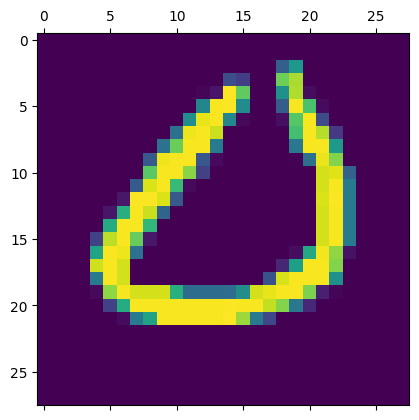

In [50]:
rnd=np.random.randint(0,len(X_train)-1)
print(y_train[rnd])
plt.matshow(X_train[rnd])

In [51]:
def convert_to_one_hot(y, num_classes):
    num_samples = len(y)
    one_hot_labels = np.zeros((num_samples, num_classes))

    for i in range(num_samples):
        one_hot_labels[i, y[i]] = 1

    return one_hot_labels

In [52]:
input_shape = X_train.shape[1:] + (1,) #(28,28,1)

# Reshape the images
X_train_reshaped = np.reshape(X_train, (len(X_train),) + input_shape)
X_test_reshaped = np.reshape(X_test, (len(X_test),) + input_shape)

In [53]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [54]:
y_train_one_hot,y_test_one_hot = convert_to_one_hot(y_train,10),convert_to_one_hot(y_test,10)
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [55]:
train_data, val_data, train_labels, val_labels = train_test_split(X_train_reshaped, y_train_one_hot, test_size=0.2, random_state=42)

In [57]:
def create_cnn_model(input_shape, channels, num_classes,kernel_sizes):
    model = tf.keras.models.Sequential()

    # Convolutional layers
    for i, (channel, kernel_size) in enumerate(zip(channels, kernel_sizes)):
        layer_name = f'conv_layer_{i + 1}_{kernel_size}x{kernel_size}_relu' if i == 0  else f'conv_layer_{i + 1}_{kernel_size}x{kernel_size}'
        if i == 0 :
            model.add(tf.keras.layers.Conv2D(channel, (kernel_size, kernel_size), activation='relu', input_shape=input_shape,name=layer_name))
        else:
            model.add(tf.keras.layers.Conv2D(channel, (kernel_size, kernel_size), activation='relu',name=layer_name))
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Flatten the output and add Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu', name='last_dense_layer_relu'))
    model.add(tf.keras.layers.Dense(num_classes,activation='softmax',name='output_softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [58]:
epochs = 10
batch_size=32

In [59]:
def one_hot_to_categorical(one_hot_labels):
    return np.argmax(one_hot_labels, axis=1)

def plot_confusion_matrix(y_test, y_pred, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def make_and_test_model(input_shape, channels, num_classes, kernel_sizes):
    model = create_cnn_model(input_shape, channels, num_classes,kernel_sizes)
    print("MOdel summary---------->>")
    print(model.summary())
    print()
    model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data, val_labels))
    print("Model training done------------")
    y_pred_one_hot = model.predict(X_test_reshaped)

    y_pred = one_hot_to_categorical(y_pred_one_hot)
    print("Plotting confusion matrix")
    plot_confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    return [model,y_pred]

In [60]:
input_shape = X_train.shape[1:] + (1,)
num_classes=10

MOdel summary---------->>
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_3x3_relu (Con  (None, 26, 26, 32)        320       
 v2D)                                                            
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 last_dense_layer_relu (Den  (None, 64)                346176    
 se)                                                             
                                                                 
 output_softmax (Dense)      (None, 10)                650       
                            

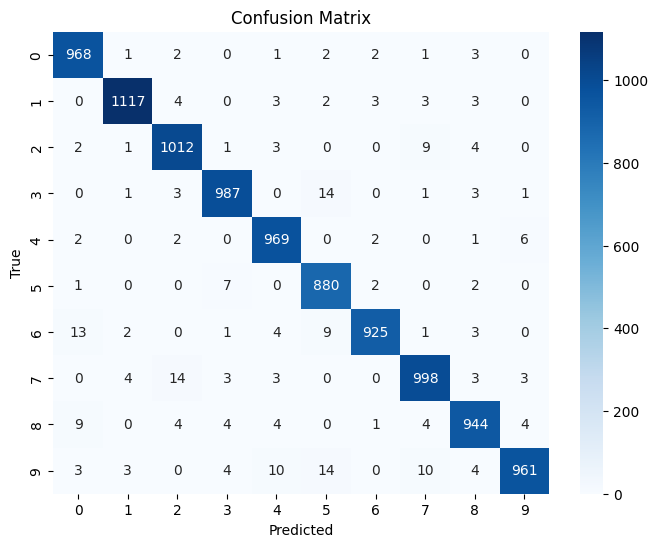

Confusion Matrix:
 [[ 968    1    2    0    1    2    2    1    3    0]
 [   0 1117    4    0    3    2    3    3    3    0]
 [   2    1 1012    1    3    0    0    9    4    0]
 [   0    1    3  987    0   14    0    1    3    1]
 [   2    0    2    0  969    0    2    0    1    6]
 [   1    0    0    7    0  880    2    0    2    0]
 [  13    2    0    1    4    9  925    1    3    0]
 [   0    4   14    3    3    0    0  998    3    3]
 [   9    0    4    4    4    0    1    4  944    4]
 [   3    3    0    4   10   14    0   10    4  961]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98    

In [61]:
channels_1 = [32]
kernel_sizes=[3]
model_1,y_pred_1=make_and_test_model(input_shape, channels_1, num_classes,kernel_sizes)


In [62]:
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test_reshaped, y_test_one_hot)
print(f'Test accuracy of model_1: {test_accuracy_1}')

313/313 [==============================] - 2s 5ms/step - loss: 0.1426 - accuracy: 0.9761
Test accuracy of model_1: 0.9761000275611877


In [ ]:
tf.keras.utils.plot_model(model_1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)


MOdel summary---------->>
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_3x3_relu (Con  (None, 26, 26, 32)        320       
 v2D)                                                            
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv_layer_2_3x3 (Conv2D)   (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                            

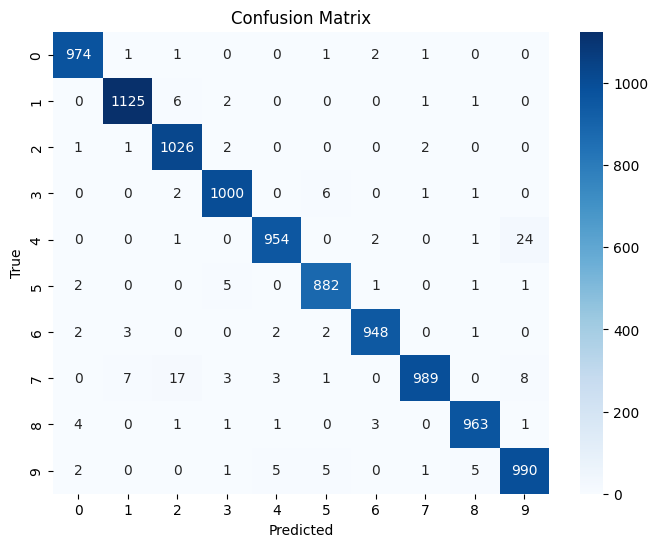

Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1125    6    2    0    0    0    1    1    0]
 [   1    1 1026    2    0    0    0    2    0    0]
 [   0    0    2 1000    0    6    0    1    1    0]
 [   0    0    1    0  954    0    2    0    1   24]
 [   2    0    0    5    0  882    1    0    1    1]
 [   2    3    0    0    2    2  948    0    1    0]
 [   0    7   17    3    3    1    0  989    0    8]
 [   4    0    1    1    1    0    3    0  963    1]
 [   2    0    0    1    5    5    0    1    5  990]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99    

In [64]:
channels_2 = [32,64]
kernel_sizes=[3,3]
model_2,y_pred_2=make_and_test_model(input_shape, channels_2, num_classes,kernel_sizes)


In [65]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test_reshaped, y_test_one_hot)
print(f'Test accuracy for Model 2: {test_accuracy_2}')


313/313 [==============================] - 5s 13ms/step - loss: 0.0681 - accuracy: 0.9851
Test accuracy for Model 2: 0.9850999712944031


In [ ]:

tf.keras.utils.plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)
